>  
### [Data link](https://www.kaggle.com/shahir/protein-data-set)



#### There are many biomolecules present in the body of living organism. These include DNA, RNA, proteins, sugar molecules, fats etc.
#### Protein is one of the most important biomolecule in our body and it serves vast ranges of functions.
####  DNA  gets transcribed to RNA and RNA is translated to protein.
#### Protein is a polymer of amino acids. Amino acids are the basic building blocks of protein.
#### There are 20 different amino acids that make most of the protein. They are denoted by 20 different alphabets.
#### [Amino acid and one letter code](http://www.fao.org/3/Y2775E/y2775e0e.htm)
#### Protein have various length.
#### The sequence with which amino acids combine to produce protein determines its function and structure.
#### Amino acids themselves have different chemical and physical properties.
#### So protein sequence is very important in determining its function.
#### There are different ways to find its function, experimentally.
#### In this project, I will try to determine proteins function using machine learning models


* There are two csv files for this project. There needs to be a merge done. Since we are only interested in proteins, we need to filter out other biomolecules

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
df1 = pd.read_csv("../input/pdb_data_no_dups.csv")

#### This dataframe (df1) contains different data about different biomolecules (not only proteins) and how their structures were determined. This DF mostly deals with structure of the biomolecules and the techniques that were used. The most important feature of this DF is the classification column which is our target later on

In [117]:
df1.shape

(141401, 14)

In [118]:
df1.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


#### Lets us have a look at this DF and its features. 
* structureId is a unique key for molecules (Primary Key)
* classification is the type of molecules it is and the role they play (our target)
* experimentalTechnique is the technique that the researchers used to determine the 3D structure of that molecule
* residueCount is the number of different residue present in the molecule
* resolution is the resolution of the 3D structure of the molecule and the technique they used
* structureMolecularWeight is the molecular weight of the molecule.
* crystallizationMethod is the method they used to get the crystals for different experimental technique. (crystallixation method is the initial step before the determination of 3D structure
* crystallizationTempK is the temperature at which the crystals were formed in Kelvin.
* densityMatthews is the density of the crystal
* densityPercentSol is the percent of solvent in the crystal
* pdbxDetails is the additional details of the crystals
* pH value is the pH of the crystal
* publicationYear is the year the structure was published

### Let us do some EDA  on df1

#### Lets check the publication year and the trend of protein structure determination

In [119]:
df1.structureId.nunique()

140911

In [120]:
df1['publicationYear'].min()

201.0

#### There seems to be a mistake in publication year. 201 is the year given which seems in correct.

In [121]:
py= df1.groupby("publicationYear").structureId.count()

#### Dropping the outlier 

In [122]:
py.drop(labels = 201.0, inplace = True)

Text(0, 0.5, 'Number of structure determined')

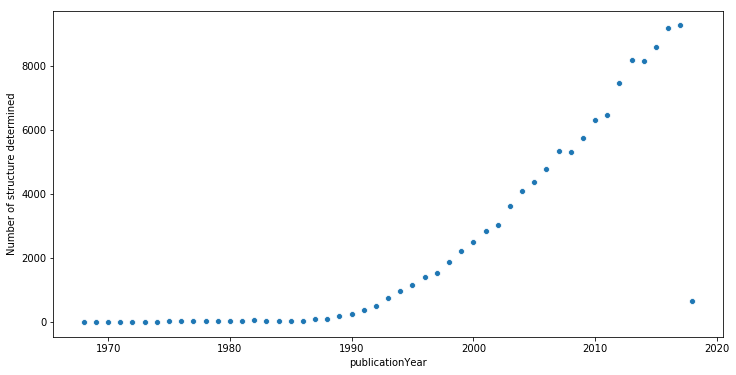

In [123]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = py.keys(), y = py )
plt.ylabel("Number of structure determined")


#### This figure clearly states the advancement in techniques used to determine the structure of the molecules. Since 1990, it has taken off

### Lets checkout classification

In [124]:
print ("There are {} different biomolecules present in the dataset".format(df1.classification.nunique()))

There are 5050 different biomolecules present in the dataset


In [125]:
clas = (df1.classification.value_counts())[0:20]
clas

HYDROLASE                                20915
TRANSFERASE                              15777
OXIDOREDUCTASE                           12494
LYASE                                     4329
IMMUNE SYSTEM                             4075
TRANSCRIPTION                             3691
TRANSPORT PROTEIN                         3251
SIGNALING PROTEIN                         2904
HYDROLASE/HYDROLASE INHIBITOR             2677
ISOMERASE                                 2602
VIRAL PROTEIN                             2320
LIGASE                                    2133
PROTEIN BINDING                           1892
DNA                                       1765
STRUCTURAL GENOMICS, UNKNOWN FUNCTION     1738
MEMBRANE PROTEIN                          1731
TRANSFERASE/TRANSFERASE INHIBITOR         1695
DNA BINDING PROTEIN                       1517
RIBOSOME                                  1462
METAL BINDING PROTEIN                     1383
Name: classification, dtype: int64

Text(0.5, 1.0, 'Top 20 Different molecules in the database')

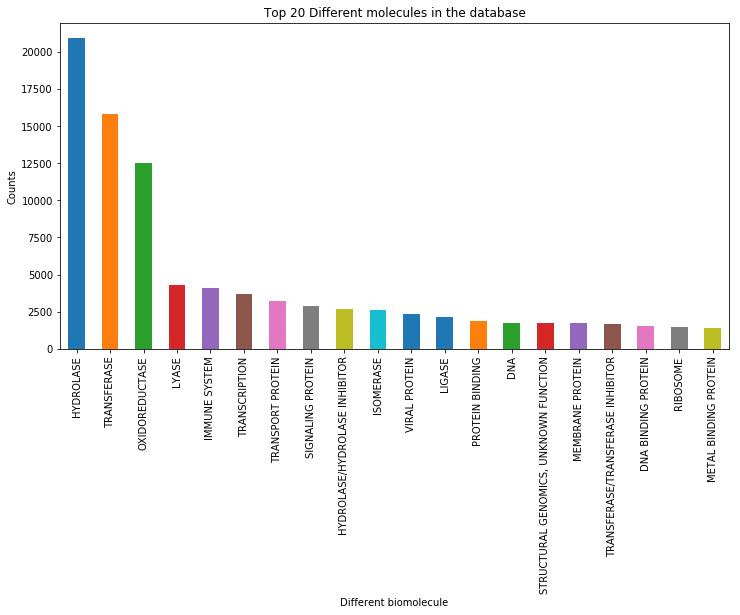

In [126]:
plt.figure(figsize=(12,6))
clas.plot(kind = "bar")
plt.ylabel("Counts")
plt.xlabel("Different biomolecule")
plt.title("Top 20 Different molecules in the database")

### The classification columns has different molecules. Out of which (Hydrolase, Transferase, Oxidoreductase, Lyase) are all enzymes. Important to note that ALL ENZYMES ARE PROTEINS BUT NOT ALL PROTEINS ARE ENZYMES.
#### We can also see that there are DNA structures in this dataframe also, which we need to get rid of.

### Let us checkout macromoleculetype

In [127]:
df1.macromoleculeType.nunique()

13

### Among macromolecules that are present, majority are proteins. There are many DNA and RNA also as show in the piechart below.

In [128]:
df1.macromoleculeType.value_counts()

Protein                       127798
Protein#DNA                     4176
Protein#RNA                     2162
DNA                             1744
RNA                             1295
Protein#DNA#RNA                  250
DNA/RNA Hybrid                    58
DNA#RNA                           51
Protein#DNA#DNA/RNA Hybrid        34
RNA#DNA/RNA Hybrid                27
Protein#DNA/RNA Hybrid            19
DNA#DNA/RNA Hybrid                13
Protein#RNA#DNA/RNA Hybrid         9
Name: macromoleculeType, dtype: int64

### Making a piechart of the macromolecule type. Piechart shows top 5 macromolecules in the dataset

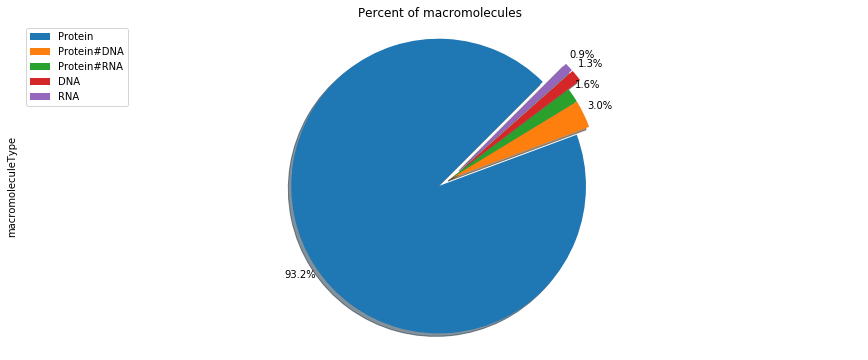

In [129]:
explode_list = [0.1, 0, 0, 0.1, 0.1]
plt.figure(figsize=(15,6))
df1.macromoleculeType.value_counts()[0:5].plot(kind = 'pie', autopct='%1.1f%%',labels=None,
                                         pctdistance=1.12, explode = explode_list, startangle=45,
                                              shadow = True)
plt.legend(df1.macromoleculeType.value_counts()[0:5].index, loc='upper left') 
plt.axis('equal') 
plt.title("Percent of macromolecules")
plt.show()


### Protein#DNA means it is a hybrid structure of protein and DNA

## MacromoleculeType is the biomolecules (protein, DNA, RNA) and classification columns denotes furthur classification of biomolecules. For eg, what kinds of protein it is and what role does it play

### X-Ray Diffraction is the top Experimental technique to determine the structure of the macromolecule

In [130]:
df1.experimentalTechnique.value_counts()[0:5]

X-RAY DIFFRACTION           126432
SOLUTION NMR                 12268
ELECTRON MICROSCOPY           2252
SOLID-STATE NMR                 99
ELECTRON CRYSTALLOGRAPHY        74
Name: experimentalTechnique, dtype: int64

### Since most of other columns deals with experimental techniques for 3D structure determination and doesnot relate to protein sequence and function. I will skip it

### Lets have a look at the other dataset

In [131]:
df2 = pd.read_csv("../input/pdb_data_seq.csv")
df2.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


### This dataframe has info about macromolecules sequence. Like protein DNA/RNA also has sequence which are made up of nucleotide(its building block), represented by A,T,C,G (only four)
* structureId is the primary key which can also be found in df1 dataframe
* chainId is represents id of the different chain that a protein possesses. Protein can be made up of different chains
* sequence is the protein sequence which is represented by one letter alphabetical code for each amino acid. Its order is valuable to determine protein function and classification.
* residueCount is the same as df1
* macromleuleType represents the type of biomolecule it is (Protein, DNA, RNA, hybrids)

### The aim of this project is to determine the classification of protein through the use of their sequence.

In [132]:
df2.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [133]:
df2.structureId.nunique()

140250

In [134]:
df2.shape

(467304, 5)

In [135]:
df2.macromoleculeType.value_counts()

Protein                       345180
Protein#RNA                    56226
Protein#DNA                    21303
DNA                             3784
Protein#DNA#RNA                 2712
RNA                             2389
Protein#RNA#DNA/RNA Hybrid       304
Protein#DNA#DNA/RNA Hybrid       159
DNA/RNA Hybrid                   141
DNA#RNA                          121
RNA#DNA/RNA Hybrid                74
Protein#DNA/RNA Hybrid            68
DNA#DNA/RNA Hybrid                26
Name: macromoleculeType, dtype: int64

### We can see that like the previous dataframe df1, it has more proteins than DNA, RNA or any other kinds of hybrid.

### Now let us merge the two dataframe in order to a final DF. The merge should be a inner merge on structureId

In [136]:
df = df1.merge(df2, how ="inner", on ="structureId")

In [137]:
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24,DNA
3,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24,DNA
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [138]:
df.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType_x', 'residueCount_x', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear', 'chainId', 'sequence',
       'residueCount_y', 'macromoleculeType_y'],
      dtype='object')

#### Dropping duplicate columns which were common in both dataframe

In [139]:
df.drop(['residueCount_y', 'macromoleculeType_y'], axis =1, inplace = True)

### Since this DF contains different macromolecules and we are only inetrested in protein. Let us make a Df which only has protein as a macromolecule

In [140]:
df = df[df['macromoleculeType_x'] == "Protein"]

In [141]:
df.shape

(346325, 16)

In [142]:
df['macromoleculeType_x'].nunique()

1

### Now we have a dataframe with only protein as a macromolecule. now let us see if there are any missing data

In [143]:
df.isnull().sum()

structureId                      0
classification                   1
experimentalTechnique            0
macromoleculeType_x              0
residueCount_x                   0
resolution                   16093
structureMolecularWeight         0
crystallizationMethod       105728
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
pdbxDetails                  51628
phValue                      87195
publicationYear              50962
chainId                          2
sequence                         3
dtype: int64

### Since our main feature is sequence, and there are only 3 sequence missing, I will drop those three rows. Since replacing a sequence doesnot make sense. Sequence is specific for a preotein, replacing doesnot make sense. This same logic applies for classification also, which as one value missing

In [144]:
df = df[pd.notnull(df['sequence'])]

In [145]:
df = df[pd.notnull(df['classification'])]

In [146]:
df.isnull().sum()

structureId                      0
classification                   0
experimentalTechnique            0
macromoleculeType_x              0
residueCount_x                   0
resolution                   16093
structureMolecularWeight         0
crystallizationMethod       105728
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
pdbxDetails                  51628
phValue                      87194
publicationYear              50962
chainId                          2
sequence                         0
dtype: int64

### Looking at the sequence, I found that some of them contains the letter 'X', which denotes unknown amino acid. This doesnot add anything to the sequence. So, let's drop the rows with many Xs in its sequence

In [147]:
df.loc[df['sequence'].str.contains('(^XXXX)+')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
2321,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,3.52,61.00,pH 7.5,7.5,1995.0,C,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2322,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,3.52,61.00,pH 7.5,7.5,1995.0,D,XXXXXXXXXXXXXXXX
2325,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,NaN,NaN,NaN,NaN,1995.0,C,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2326,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,NaN,NaN,NaN,NaN,1995.0,D,XXXXXXXXXXXXXXXX
3622,1BCC,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,2048,3.16,467225.78,NaN,NaN,3.83,67.90,"20MM KMES PH6.7, 75MM NACL, 10% GLYCEROL, AND ...",6.7,1998.0,I,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
5553,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,A,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
5554,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,B,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
5555,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,C,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
5556,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,D,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
5557,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,E,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...


In [148]:
index_to_drop = df.loc[df['sequence'].str.contains('(^XXXX)+')].index

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [149]:
df.drop(index = index_to_drop, inplace = True)

In [150]:
df.shape

(344956, 16)

### Most of the columns have no relation to the classification(function) of the protein (because they are related to the techniques used to get the structure). I am dropping those columns and only keep the sequence as it is the main feature to classify protein

In [151]:
df_prot = df[["structureId", "classification", "sequence", "chainId"]]

### Selecting proteins that are more than 20 amino acids long. Smallest known protein is 20 amino acid long.

In [152]:
df_prot["seq_length"] = df_prot["sequence"].apply(len)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
df_prot = df_prot[df_prot['seq_length'] > 20]

### Making a column for the length of the protein sequence. Protein length is given by the total number of amino acids in the sequence.

Text(0, 0.5, 'Frequency')

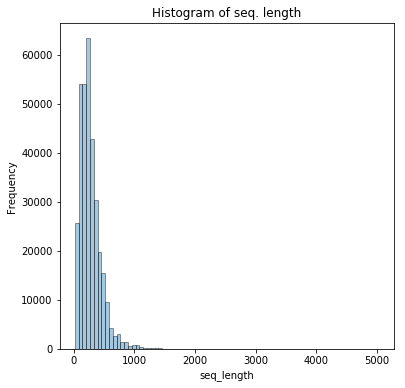

In [154]:
plt.figure(figsize=(6,6))
sns.distplot(df_prot["seq_length"], bins = 80, kde = False, hist_kws={'edgecolor':'k'})
plt.title("Histogram of seq. length")
plt.ylabel("Frequency")

### The sequence length of all the proteins has a median 250 - 300 amino acid long.

### Let us have a look at the most prevalent types of protein present in this dataframe. It seems like the top 5 proteins are all enzymes

In [155]:
clas_prot = df_prot.groupby("classification").structureId.count().sort_values(ascending = False)[0:20]

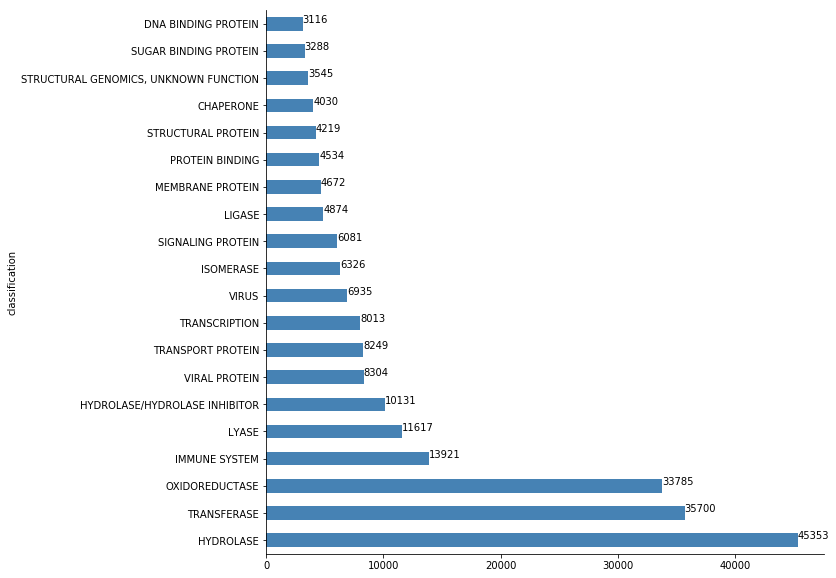

In [156]:
ax = clas_prot.plot(kind = "barh", figsize=(10,10), color='steelblue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i, v in enumerate(clas_prot):
    ax.text(v + 3, i + .045, str(v), color='black')
    
plt.show()

### this result replicates what was seen above earlier. But this only contains protein

In [157]:
clas_prot.keys()

Index(['HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'IMMUNE SYSTEM', 'LYASE',
       'HYDROLASE/HYDROLASE INHIBITOR', 'VIRAL PROTEIN', 'TRANSPORT PROTEIN',
       'TRANSCRIPTION', 'VIRUS', 'ISOMERASE', 'SIGNALING PROTEIN', 'LIGASE',
       'MEMBRANE PROTEIN', 'PROTEIN BINDING', 'STRUCTURAL PROTEIN',
       'CHAPERONE', 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION',
       'SUGAR BINDING PROTEIN', 'DNA BINDING PROTEIN'],
      dtype='object', name='classification')

In [158]:
leng = df_prot.groupby("classification").seq_length.mean().get(clas_prot.keys())

Text(0, 0.5, 'Length of sequence')

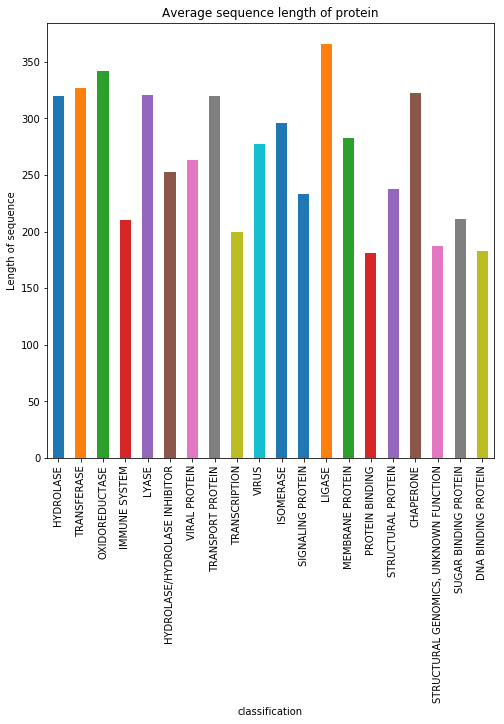

In [159]:
leng.plot(kind = "bar", figsize=(8,8))
plt.title("Average sequence length of protein")
plt.ylabel("Length of sequence")

### Since there are 4461 different values for classification. I am going to take top 20 proteins whose frequency are higher

* ### The top most prevalent (20) protein types (classification) are taken as a final filtering process to narrow down the classification types

In [160]:
df_prot_fin = df_prot[df_prot['classification'].isin(clas_prot.keys())]


In [161]:
df_prot_fin.shape

(226693, 5)

In [162]:
## df_prot_fin.to_csv("twenty_five.csv")

In [163]:
df_prot_fin["classification"].nunique()

20

### Train test split and Vectorization

In [164]:
from sklearn.model_selection import train_test_split

### TF-IDF Vectorization

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
X_train, X_test,y_train,y_test = train_test_split(df_prot_fin['sequence'], df_prot_fin['classification'], test_size = 0.3, 
                                                  random_state = 101,)

In [167]:
tfidf_transformer = TfidfVectorizer(analyzer = "char_wb", ngram_range= (4,4), 
                                    sublinear_tf= True )


In [168]:
tfidf_transformer.fit(X_train)

TfidfVectorizer(analyzer='char_wb', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(4, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [169]:
vector = tfidf_transformer.transform(X_train)

In [170]:
vector.shape

(158685, 171056)

In [171]:
vector1 = tfidf_transformer.transform(X_test)

In [172]:
vector1.shape

(68008, 171056)

### Modelling

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
from sklearn.naive_bayes import MultinomialNB

## MultinomialNB

In [175]:
model1 = MultinomialNB()

In [176]:
model1.fit(vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [177]:
pred1 = model1.predict(vector1)

In [178]:
from sklearn.metrics import classification_report, accuracy_score

In [179]:
print(classification_report(y_test, pred1))

                                       precision    recall  f1-score   support

                            CHAPERONE       0.91      0.69      0.79      1218
                  DNA BINDING PROTEIN       0.89      0.33      0.48       951
                            HYDROLASE       0.65      0.85      0.74     13560
        HYDROLASE/HYDROLASE INHIBITOR       0.71      0.74      0.72      3035
                        IMMUNE SYSTEM       0.91      0.84      0.87      4158
                            ISOMERASE       0.95      0.59      0.73      1934
                               LIGASE       0.91      0.47      0.62      1490
                                LYASE       0.97      0.75      0.84      3498
                     MEMBRANE PROTEIN       0.79      0.46      0.58      1411
                       OXIDOREDUCTASE       0.87      0.92      0.89     10186
                      PROTEIN BINDING       0.89      0.26      0.41      1367
                    SIGNALING PROTEIN       0.74   

In [180]:
MR_accuracy = (accuracy_score(y_test, pred1))

In [181]:
MR_accuracy

0.7572197388542524

In [182]:
from sklearn.model_selection import cross_val_score

In [183]:
model1 = MultinomialNB()

In [184]:
scores = cross_val_score(model1, vector, y_train, cv=5, scoring = "accuracy")

In [185]:
print("Scores:", scores)
print("\n")
print("Mean:", scores.mean())
print("\n")
print("Standard Deviation:", scores.std())

Scores: [0.73847026 0.74195073 0.73833454 0.74137333 0.7419548 ]


Mean: 0.7404167333194597


Standard Deviation: 0.0016588039610526664


## Logistic Regression


In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
lg = LogisticRegression()

In [188]:
lg.fit(vector, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [189]:
yh = lg.predict(vector1)

In [190]:
print(classification_report(y_test, yh))

                                       precision    recall  f1-score   support

                            CHAPERONE       0.93      0.80      0.86      1218
                  DNA BINDING PROTEIN       0.92      0.56      0.70       951
                            HYDROLASE       0.74      0.92      0.82     13560
        HYDROLASE/HYDROLASE INHIBITOR       0.78      0.70      0.74      3035
                        IMMUNE SYSTEM       0.93      0.91      0.92      4158
                            ISOMERASE       0.96      0.84      0.89      1934
                               LIGASE       0.94      0.73      0.82      1490
                                LYASE       0.97      0.88      0.92      3498
                     MEMBRANE PROTEIN       0.83      0.64      0.72      1411
                       OXIDOREDUCTASE       0.94      0.97      0.95     10186
                      PROTEIN BINDING       0.85      0.49      0.62      1367
                    SIGNALING PROTEIN       0.82   

In [191]:
LR_accuracy = (accuracy_score(y_test, yh))

In [192]:
LR_accuracy

0.8554728855428773

In [193]:
scores = cross_val_score(lg, vector, y_train, cv=5, scoring = "accuracy")

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [194]:
print("Scores:", scores)
print("\n")
print("Mean:", scores.mean())
print("\n")
print("Standard Deviation:", scores.std())

Scores: [0.83669355 0.83810094 0.83707741 0.83811805 0.83833958]


Mean: 0.8376659063785332


Standard Deviation: 0.0006541149802192369


## RandomForest

In [195]:
from sklearn.ensemble import RandomForestClassifier


In [196]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [197]:
clf.fit(vector, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [198]:
yh2 = clf.predict(vector1)

In [199]:
print(classification_report(y_test, yh2))

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                       precision    recall  f1-score   support

                            CHAPERONE       0.00      0.00      0.00      1218
                  DNA BINDING PROTEIN       0.00      0.00      0.00       951
                            HYDROLASE       0.21      1.00      0.34     13560
        HYDROLASE/HYDROLASE INHIBITOR       0.00      0.00      0.00      3035
                        IMMUNE SYSTEM       0.93      0.40      0.56      4158
                            ISOMERASE       0.00      0.00      0.00      1934
                               LIGASE       0.00      0.00      0.00      1490
                                LYASE       0.00      0.00      0.00      3498
                     MEMBRANE PROTEIN       0.00      0.00      0.00      1411
                       OXIDOREDUCTASE       0.00      0.00      0.00     10186
                      PROTEIN BINDING       0.00      0.00      0.00      1367
                    SIGNALING PROTEIN       0.00   

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [200]:
RF_accuracy = (accuracy_score(y_test, yh2))
RF_accuracy

0.23635454652393836

In [201]:
scores = cross_val_score(clf, vector, y_train, cv=5, scoring = "accuracy")

In [202]:
print("Scores:", scores)
print("\n")
print("Mean:", scores.mean())
print("\n")
print("Standard Deviation:", scores.std())

Scores: [0.23626512 0.23357066 0.23359274 0.23641005 0.23084439]


Mean: 0.2341365925541273


Standard Deviation: 0.002056884313105752


## LinearSVC

In [203]:
from sklearn.svm import LinearSVC
lsv = LinearSVC()
lsv.fit(vector, y_train)
yh3 = lsv.predict(vector1)
LSV_accuracy = round(accuracy_score(y_test, yh3),2)


In [204]:
from sklearn.svm import LinearSVC

In [205]:
lsv = LinearSVC()

In [206]:
lsv.fit(vector, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [207]:
yh3 = lsv.predict(vector1)

In [208]:
LSV_accuracy = round(accuracy_score(y_test, yh3),2)

In [209]:
LSV_accuracy

0.92

In [210]:
scores = cross_val_score(lsv, vector, y_train, cv=5, scoring = "accuracy")

In [211]:
print("Scores:", scores)
print("\n")
print("Mean:", scores.mean())
print("\n")
print("Standard Deviation:", scores.std())

Scores: [0.90451739 0.90501544 0.90374618 0.90448429 0.90323699]


Mean: 0.9042000574458886


Standard Deviation: 0.0006292590043737283


In [212]:
Accuracy = pd.DataFrame(index = ["MB", "LG", "SVC", "RF"], data = [MR_accuracy, LR_accuracy, LSV_accuracy, RF_accuracy], columns = ["Accuracy"])

In [213]:
Accuracy

,Accuracy
MB,0.757220
LG,0.855473
SVC,0.920000
RF,0.236355


In [214]:
import seaborn as sns

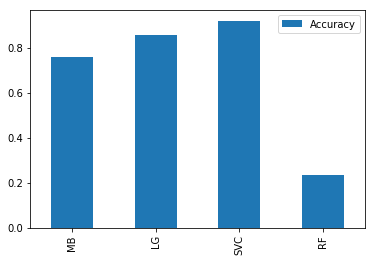

In [215]:
Accuracy.plot(kind = "bar")

**Linear Support vector seems to do a better job at this classification. Random Forest seems to be way off **

### Keras Sequential

### Using tfidf vectors for the implementation of the model

### Since Keras takes only integers for the training, I am going to convert the y features into a one hot encoded label.

In [216]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [217]:
encoder = LabelEncoder()

encoder.fit(y_train)
encoded_y = encoder.transform(y_train)

dummy_ytrain = np_utils.to_categorical(encoded_y)

In [218]:
encoder1 = LabelEncoder()

encoder1.fit(y_test)
encoded_y1 = encoder1.transform(y_test)

dummy_ytest = np_utils.to_categorical(encoded_y1)

In [219]:
dummy_ytrain[0:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [220]:
from keras.models import Sequential
from keras.layers import Dense

In [221]:
input_dim = (vector.shape[1])

In [222]:
model = Sequential()
model.add(Dense(units = 128, activation = "relu", input_dim=input_dim)) # the numbers of features as the input_dim

model.add(Dense(units= 20, activation = "softmax"))

In [223]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               21895296  
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2580      
Total params: 21,897,876
Trainable params: 21,897,876
Non-trainable params: 0
_________________________________________________________________


### I have chosen a validation set from the training data and compare the accuracy with the accuracy of the training data. The model seems to have a high accuracy for the training sets of data as compared to validation sets, which generally implies that the model is may be slightly overfitting.

In [224]:
history = model.fit(vector, dummy_ytrain,
epochs=5,
verbose=1,
validation_split=0.33,
batch_size=128)

Train on 106318 samples, validate on 52367 samples
Epoch 1/5
106318/106318 [==============================] - 198s 2ms/step - loss: 0.9480 - acc: 0.7569 - val_loss: 0.4481 - val_acc: 0.8755
Epoch 2/5
106318/106318 [==============================] - 197s 2ms/step - loss: 0.2485 - acc: 0.9291 - val_loss: 0.3911 - val_acc: 0.8833
Epoch 3/5
106318/106318 [==============================] - 198s 2ms/step - loss: 0.1813 - acc: 0.9400 - val_loss: 0.3900 - val_acc: 0.8854
Epoch 4/5
106318/106318 [==============================] - 197s 2ms/step - loss: 0.1637 - acc: 0.9449 - val_loss: 0.3855 - val_acc: 0.8887
Epoch 5/5
106318/106318 [==============================] - 198s 2ms/step - loss: 0.1538 - acc: 0.9479 - val_loss: 0.3872 - val_acc: 0.8865


In [225]:
scores = model.evaluate(vector1, dummy_ytest, verbose=1)

68008/68008 [==============================] - 51s 750us/step


In [226]:
scores

[0.3915350341391786, 0.8884837077990825]

In [227]:
Accuracy = pd.DataFrame(index = ["MB", "LG", "SVC", "RF", "Keras"], data = [MR_accuracy, LR_accuracy, LSV_accuracy, RF_accuracy, scores[1]], columns = ["Accuracy"])

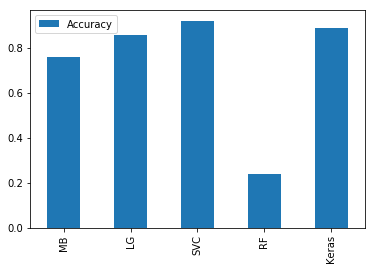

In [228]:
Accuracy.plot(kind = "bar")

### This model can be improved 

* Things to consider in the future may be when tfidf vectorization is carried out, introduce some restriction on the number of sequence

* The number of layers can be tested with more than one, 

* The number of neurons in the hidden layer needs to be optimized. There doesnot seem to be a solid answer for how many neurons should be there. I have tried 100, 200, 500, all seems to yield more or near th same number

May be some regulariation should be done, such as using drop out method.